<div style="text-align:center">
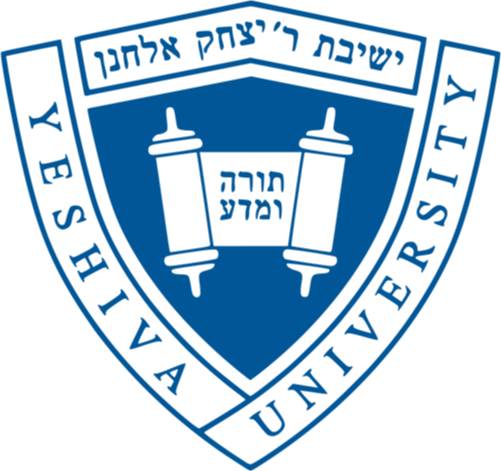
</div>

<br><br>
<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5001 Data Acquisition & Management</h1>
<p>
<h2 style='text-align: center;'>Assignment M11</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

# **Part 1:** Tidying and Reshaping Data

#### Importing the necessary libraries

In [150]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings("ignore")

#### Loding Data

In [151]:
# The file path to my online AIM 5001 Github Repository with the "M11_Data.csv" and "bridges.data.version1.csv" files
filePathOil = r"https://raw.githubusercontent.com/rjholik/AIM-5001-Data-Acquisition-Management/main/Module%2011/M11_Data.csv"

dfOil = pd.read_csv(filePathOil)

In [152]:
dfOil

,Month,Category,Caltex,Gulf,Mobil
0,Open,Engine Oil,140 : 000,199 : 000,141 : 000
1,NaN,GearBox Oil,198 : 000,132 : 000,121 : 000
2,Jan,Engine Oil,170 : 103,194 : 132,109 : 127
3,NaN,GearBox Oil,132 : 106,125 : 105,191 : 100
4,Feb,Engine Oil,112 : 133,138 : 113,171 : 101
5,NaN,GearBox Oil,193 : 148,199 : 119,134 : 127
6,Mar,Engine Oil,184 : 100,141 : 141,114 : 108
7,NaN,GearBox Oil,138 : 121,172 : 133,193 : 115
8,Apr,Engine Oil,149 : 150,117 : 118,117 : 118
9,NaN,GearBox Oil,185 : 125,191 : 133,119 : 121


## Task 1.1
**(30 Points)**: Use your knowledge of combining and reshaping data in Pandas to tidy and transform/reshape the data contained within the dataframe. To get started, think about how you would want the data to appear if it were converted to “long” format, e.g., how would you define a “single observation” for the data shown in the graphic?; How many key values are associated with each data value?; How many key values are associated with each data value?; What would the column headings for the long structure be?; etc. Use your answers to these questions to guide your reshaping/transformational work on the data. **Your reshaping/transformational steps <u>must</u> include converting the above table to a “tidy” long format.** Additional transformational steps (e.g., filling in missing data values, renaming columns, etc.) should be performed as needed to ensure that your data is, in fact, “tidy”.

### __Long Format__

In [153]:
# Converting the original wide to long using melt method
longDfOil = pd.melt(dfOil,
                       ["Month","Category"],
                       var_name = "Supplier",
                       value_name= "Purchased : Consumed")
longDfOil.head(15)

,Month,Category,Supplier,Purchased : Consumed
0,Open,Engine Oil,Caltex,140 : 000
1,NaN,GearBox Oil,Caltex,198 : 000
2,Jan,Engine Oil,Caltex,170 : 103
3,NaN,GearBox Oil,Caltex,132 : 106
4,Feb,Engine Oil,Caltex,112 : 133
5,NaN,GearBox Oil,Caltex,193 : 148
6,Mar,Engine Oil,Caltex,184 : 100
7,NaN,GearBox Oil,Caltex,138 : 121
8,Apr,Engine Oil,Caltex,149 : 150
9,NaN,GearBox Oil,Caltex,185 : 125


In [154]:
# Filling Nan Values
longDfOil['Month'].fillna(method='ffill', inplace = True)
longDfOil.head(15)

,Month,Category,Supplier,Purchased : Consumed
0,Open,Engine Oil,Caltex,140 : 000
1,Open,GearBox Oil,Caltex,198 : 000
2,Jan,Engine Oil,Caltex,170 : 103
3,Jan,GearBox Oil,Caltex,132 : 106
4,Feb,Engine Oil,Caltex,112 : 133
5,Feb,GearBox Oil,Caltex,193 : 148
6,Mar,Engine Oil,Caltex,184 : 100
7,Mar,GearBox Oil,Caltex,138 : 121
8,Apr,Engine Oil,Caltex,149 : 150
9,Apr,GearBox Oil,Caltex,185 : 125


In [155]:
# Two new columns with split values in "Purchased : Consumed" 
longDfOil[["Purchased","Consumed"]] = longDfOil["Purchased : Consumed"].str.split(":", n = 1, expand = True)

# Dropping old Name columns
longDfOil.drop(columns =["Purchased : Consumed"], inplace = True)

longDfOil.head(15)

,Month,Category,Supplier,Purchased,Consumed
0,Open,Engine Oil,Caltex,140,000
1,Open,GearBox Oil,Caltex,198,000
2,Jan,Engine Oil,Caltex,170,103
3,Jan,GearBox Oil,Caltex,132,106
4,Feb,Engine Oil,Caltex,112,133
5,Feb,GearBox Oil,Caltex,193,148
6,Mar,Engine Oil,Caltex,184,100
7,Mar,GearBox Oil,Caltex,138,121
8,Apr,Engine Oil,Caltex,149,150
9,Apr,GearBox Oil,Caltex,185,125


In [156]:
# The data type of the individual columns
longDfOil.dtypes

Month        object
Category     object
Supplier     object
Purchased    object
Consumed     object
dtype: object

In [157]:
# Converting the two new columns to int
longDfOil['Purchased'] = longDfOil['Purchased'].astype(int)
longDfOil['Consumed'] = longDfOil['Consumed'].astype(int)

longDfOil.head(15)

,Month,Category,Supplier,Purchased,Consumed
0,Open,Engine Oil,Caltex,140,0
1,Open,GearBox Oil,Caltex,198,0
2,Jan,Engine Oil,Caltex,170,103
3,Jan,GearBox Oil,Caltex,132,106
4,Feb,Engine Oil,Caltex,112,133
5,Feb,GearBox Oil,Caltex,193,148
6,Mar,Engine Oil,Caltex,184,100
7,Mar,GearBox Oil,Caltex,138,121
8,Apr,Engine Oil,Caltex,149,150
9,Apr,GearBox Oil,Caltex,185,125


### __This data frame is now in the form of "tidy" after several modifications which are mentioned above. Each record is a single observation, which includes "Month", "Category" and "Supplier". This record also contains two variables such as "Purchased" and "Consumed".__

## Task 1.2
**(15 Points)**: Using your reshaped/transformed data, perform analysis to answer the following questions:

- What was the amount of oil remaining for each type/brand **at the end of the chronological period**?

In [158]:
# Creating a new column "Difference"
longDfOil['Difference'] = longDfOil['Purchased'] - longDfOil['Consumed']

remain = longDfOil.groupby([longDfOil["Category"], longDfOil["Supplier"]])['Difference'].sum().reset_index().rename(columns={"Difference": "Remain"})
remain

,Category,Supplier,Remain
0,Engine Oil,Caltex,330
1,Engine Oil,Gulf,302
2,Engine Oil,Mobil,345
3,GearBox Oil,Caltex,375
4,GearBox Oil,Gulf,419
5,GearBox Oil,Mobil,299


- What was the most consumed brand of oil across the two separate categories/types of oil?

In [159]:
consume = longDfOil.groupby([longDfOil["Category"], longDfOil["Supplier"]])['Consumed'].sum().reset_index()


# Category "Engine Oil"
print(consume.iloc[consume[consume['Category'] == 'Engine Oil']['Consumed'].idxmax()])

print()

# Category "GearBox Oil"
print(consume.iloc[consume[consume['Category'] == 'GearBox Oil']['Consumed'].idxmax()])

Category    Engine Oil
Supplier          Gulf
Consumed           761
Name: 1, dtype: object

Category    GearBox Oil
Supplier         Caltex
Consumed            746
Name: 3, dtype: object


### __The most consumed oil is "Gulf" in the "Engine Oil" category.__
### __The most consumed oil is "Caltex" in the "GearBox Oil" category.__

## Task 1.3
**(15 Points)**: Finally, given your “tidy” long format structure, describe what, if any, changes you would make to the visual presentation of the data if you were then asked to transform your “long” data back into a “wide” format: would you mimic the structure of the graphic shown above? If not, how might you transform your “long” data to “wide” format to make its “wide” presentation easier to understand and work with? Provide an example of your recommendation and explain your rationale for preferring your specific structure.

In [160]:
wideDfOil = longDfOil.pivot_table(index = ['Supplier', 'Category'], columns = ['Month'], values = ['Purchased', 'Consumed'], sort=False)
wideDfOil

Purchased                               Consumed       \
Month                     Open  Jan  Feb  Mar  Apr  May  Jun     Open  Jan   
Supplier Category                                                            
Caltex   Engine Oil        140  170  112  184  149  170  159        0  103   
         GearBox Oil       198  132  193  138  185  168  107        0  106   
Gulf     Engine Oil        199  194  138  141  117  104  170        0  132   
         GearBox Oil       132  125  199  172  191  138  195        0  105   
Mobil    Engine Oil        141  109  171  114  117  200  169        0  127   
         GearBox Oil       121  191  134  193  119  121  141        0  100   

                                               
Month                 Feb  Mar  Apr  May  Jun  
Supplier Category                              
Caltex   Engine Oil   133  100  150  139  129  
         GearBox Oil  148  121  125  117  129  
Gulf     Engine Oil   113  141  118  119  138  
         GearBox Oil  119  133  133  102  141  
Mobil    Engine Oil   101  108  118  117  105  
         GearBox Oil  127  115  121  146  112

#### __The wide format mentioned above has a slightly different structure from the original long format. The trends of purchasing and consumption of each supplier and category during the indicated months are occupied in this wide format. Now months are attributes with lots of purchasing and consumption which are divided into two sectors.__

#### __This presentation presents an easy-to-understand trend structure of the two types of oil for each supplier.__

# **Part 2:** Using Your GroupBy and Data Aggregation Skills

#### Loding Data

In [161]:
# The file path to my online AIM 5001 Github Repository with the "M11_Data.csv" and "bridges.data.version1.csv" files
filePathBridges = r'https://raw.githubusercontent.com/rjholik/AIM-5001-Data-Acquisition-Management/main/Module%2011/bridges.data.version1.csv'

dfBridges = pd.read_csv(filePathBridges,
                        skiprows = 0,
                        names = ['IDENTIF',
                                 'RIVER',
                                 'LOCATION',
                                 'ERECTED',
                                 'PURPOSE',
                                 'LENGTH',
                                 'LANES',
                                 'CLEAR-G',
                                 'T-OR-D',
                                 'MATERIAL',
                                 'SPAN',
                                 'REL-L',
                                 'TYPE']
                        )

In [162]:
dfBridges.head(15)

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD
5,E7,A,27,1840,HIGHWAY,990,2,N,THROUGH,WOOD,MEDIUM,S,WOOD
6,E8,A,28,1844,AQUEDUCT,1000,1,N,THROUGH,IRON,SHORT,S,SUSPEN
7,E9,M,3,1846,HIGHWAY,1500,2,N,THROUGH,IRON,SHORT,S,SUSPEN
8,E10,A,39,1848,AQUEDUCT,?,1,N,DECK,WOOD,?,S,WOOD
9,E11,A,29,1851,HIGHWAY,1000,2,N,THROUGH,WOOD,MEDIUM,S,WOOD


## Task 2.1
**(12 Points)**: You've been asked to generate a quick report that tells us how many bridges of each '**Purpose'/'Material**' grouping within the data set have been constructed over each of the rivers listed in the data set. <u>**For each river**</u>, your output should include the Purpose, Material, and count (aka ‘How Many?’), similar to the output shown in the graphic below for River 'A', and <u>**your report should include similar content for each of the rivers**<u> contained within the data set.

<center>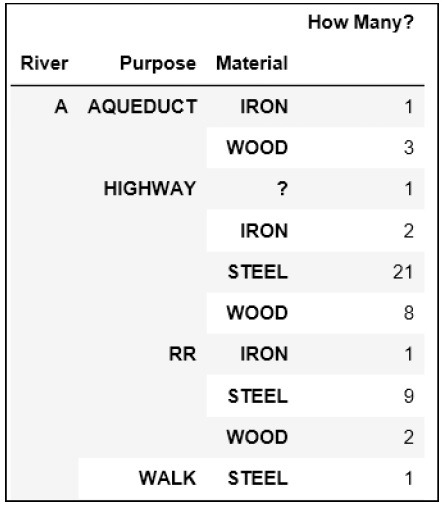</center>

You are allowed to use <u>**no more than three (3) lines**</u> of Python/Pandas code to generate this report in its entirety (i.e., you MUST produce the results for all of the rivers at once) and you **MUST** use Pandas' groupby and/or aggregation functionality to accomplish the task. **Be sure to include a brief narrative explaining how your proposed code would accomplish the task.**

In [163]:
dfBridges.groupby([dfBridges["RIVER"], dfBridges["PURPOSE"], dfBridges["MATERIAL"]])[['MATERIAL']].count().rename(columns={"MATERIAL": "How Many?"})

How Many?
RIVER PURPOSE  MATERIAL           
A     AQUEDUCT IRON              1
               WOOD              3
      HIGHWAY  ?                 1
               IRON              2
               STEEL            21
               WOOD              8
      RR       IRON              1
               STEEL             9
               WOOD              2
      WALK     STEEL             1
M     HIGHWAY  IRON              4
               STEEL            19
               WOOD              3
      RR       IRON              2
               STEEL            13
O     HIGHWAY  ?                 1
               IRON              1
               STEEL             9
      RR       STEEL             4
Y     HIGHWAY  STEEL             2
      RR       STEEL             1

#### __We group through three dataframes with the following attributes "RIVER", "PURPOSE", "MATERIAL", then we count the "MATERIAL" column, which we rename to "How Many?".__

## Task 2.2
**(14 Points)**: You've been asked to generate a second report that shows the average length for each 'Purpose'/'Material' bridge grouping within the data set. As you should recall from our previous work with the Pittsburgh Bridges data set, the 'Length' attribute is not provided to us in a numeric format and also contains many missing values. As such, you should clean up the contents of that column and convert it to numeric format before attempting to generate your report. The output of your report should appear as shown in the graphic below.

<center>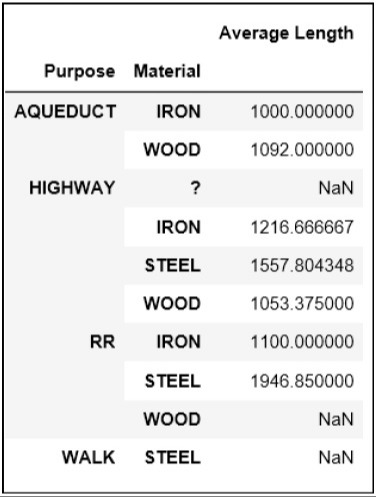</center>

You are allowed to use <u>**no more than four (4) lines**</u> of Python/Pandas code <i>**AFTER**</i> you’ve finished cleaning up the ‘Length’ column (which should take no more than 2-3 lines of code) and you MUST use Pandas’ groupby and/or aggregation functionality to accomplish the task. **Be sure to include a brief narrative explaining how your proposed code would accomplish the task.**

#### Data cleaning

In [164]:
dfBridges['LENGTH']  = dfBridges['LENGTH'].replace({'?' : np.nan}).astype(float)

#### Report generation

In [165]:
dfBridges.groupby([dfBridges["PURPOSE"], dfBridges["MATERIAL"]])[["LENGTH"]].mean().rename(columns={"LENGTH": "Average Length"})

Average Length
PURPOSE  MATERIAL                
AQUEDUCT IRON         1000.000000
         WOOD         1092.000000
HIGHWAY  ?                    NaN
         IRON         1216.666667
         STEEL        1557.804348
         WOOD         1053.375000
RR       IRON         1100.000000
         STEEL        1946.850000
         WOOD                 NaN
WALK     STEEL                NaN

#### __Similar to the previous task, here we group two data frames with the following attributes "PURPOSE", and "MATERIAL", then we average the "LENGTH" column, which we rename to "Average Length".__

## Task 2.3
**(14 Points)**: Finally, you've been asked to generate one last report that shows the average length, count, minimum length, and maximum length of bridges built during 4 equal length time periods (1818 – 1860; 1860-1902; 1902-1944; 1944-1986). The output of your report should appear as shown in the graphic below.

<center>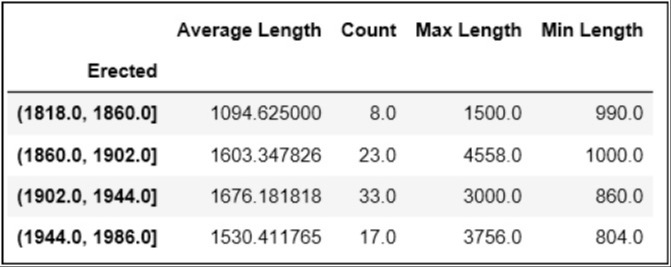</center>

You are allowed to use <u>**no more than seven (7) lines**</u> of Python/Pandas code and you must use Pandas’ groupby and/or aggregation functionality to accomplish the task. **Be sure to include a brief narrative explaining how your proposed code would accomplish the task.**

In [166]:
dfBridges.groupby(pd.cut(dfBridges["ERECTED"], np.arange(1818, 1987, 42)))['LENGTH'].agg(['mean','count','max','min']).rename(columns={"mean" : "Average Length", "count" : "Count", "max" : "Max Length", "min" : "Min Length"})

,Average Length,Count,Max Length,Min Length
ERECTED,,,,
"(1818, 1860]",1094.625000,8,1500.0,990.0
"(1860, 1902]",1603.347826,23,4558.0,1000.0
"(1902, 1944]",1676.181818,33,3000.0,860.0
"(1944, 1986]",1530.411765,17,3756.0,804.0


#### __Alike as our two previous tasks, we group the binning applied to one data frame with the attribute "ERECTED" along with the range for each period. Then, we use the aggregation agg() with four functions ("mean", "count", "max", "min") for the attribute "LENGTH". Finally, we rename the four columns.__